Number of rows:  1763
     Language  PowerLimit     Package        Core   Time  Temperature  Memory
0     Haskell          -1   72.903320   65.487793   2967         45.1    5920
1     Haskell          -1   72.392822   64.819519   2950         47.3    6240
2     Haskell          -1   75.767273   67.646912   3108         49.1    6080
3     Haskell          -1   73.907654   66.416260   2954         49.0    6080
4     Haskell          -1   74.116394   66.502380   2968         50.8    6080
...       ...         ...         ...         ...    ...          ...     ...
1195   Python         115  314.913574  279.386658  14272         52.0   43924
1196   Python         115  315.168274  280.449280  14121         54.7   43952
1197   Python         115  315.853210  280.344604  14268         52.9   44072
1198   Python         115  310.856140  277.605286  14268         52.9   43952
1199   Python         115  313.788757  278.433533  14233         55.1   43856

[1763 rows x 7 columns]


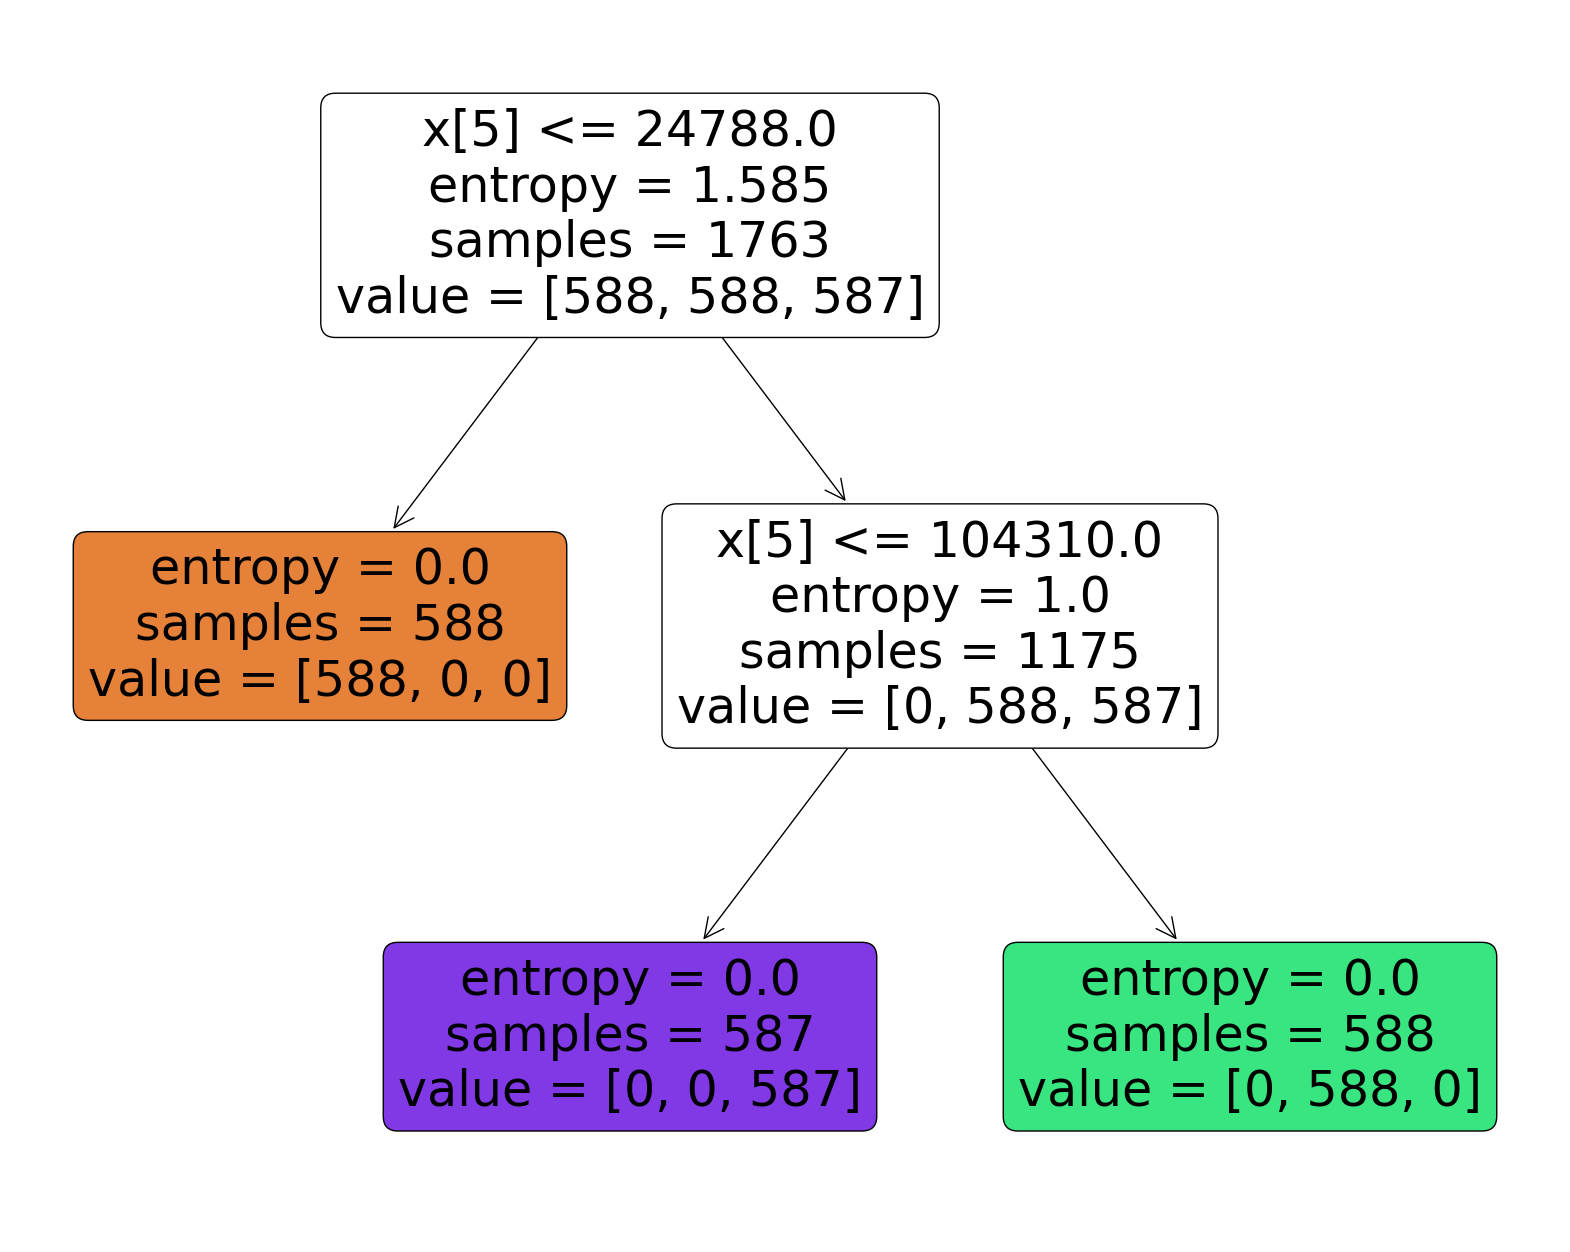

In [8]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

# Read the first dataset
df1 = pd.read_csv('../measurements_haskell.csv')

# Read the second dataset
df2 = pd.read_csv('../measurements_python.csv')

# Read the third dataset
df3 = pd.read_csv('../measurements_java.csv')

# Concatenate the datasets vertically
df = pd.concat([df1, df2, df3], ignore_index=True)

df = df[df['Package'] >= 0]
df.drop(columns=['Program',"DRAM","GPU"], inplace=True)


grouped = df.groupby(['Language', 'PowerLimit'])


df_removed_entries = pd.DataFrame()


for group_name, group_df in grouped:
    
    
    best_entry_index = group_df['Time'].idxmin()
    worst_entry_index = group_df['Time'].idxmax()
    if(best_entry_index==worst_entry_index):
        worst_entry_index+=1
    
    group_df = group_df.drop([best_entry_index, worst_entry_index])
    
    
    df_removed_entries = pd.concat([df_removed_entries, group_df])

df = df_removed_entries.copy()


print("Number of rows: ", len(df.index))
print(df)

replace_map = {
    'Language': {
        'Python ': 0,
        'Java ': 1,
        'Haskell ': 2
    }
}

y = df["Language"]
x = df.drop(columns=['Language'])
x.replace(replace_map, inplace=True)


clf = tree.DecisionTreeClassifier(random_state=2023, criterion='entropy', ccp_alpha=0.1)

plt.figure(figsize=(20, 16))
clf = clf.fit(x, y)
tree.plot_tree(clf, filled=True, rounded=True)
plt.show()
